Здесь и далее примеры из Introduction to modern statistics

Первый пример, дискримигнация по полу, были розданы одинаковые файлы людей, различался только пол кандидата, результаты повышений:
Мужчины - 21 да, 3 нет
Женщины - 14 да, 10 нет

Здесь проведем permutation test 

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
male_promote = 21
male_not_promote = 3
female_promote = 14
female_not_promote = 10
male = np.array([1] * male_promote + [0] * male_not_promote)
female = np.array([1] * female_promote + [0] * female_not_promote)

In [5]:
male_mean = np.mean(male)
female_mean = np.mean(female)

In [31]:
observed = male_mean - female_mean

Наши две гипотезы

$ H_0 $ - дискриминации нет и реальный уровень повышений для мужчин и женщин не отличается

$ H_1 $ - дискриминация есть и реальный уровени повышений для мужчин выше

In [23]:
num_of_perm = 100000
permutations = []
combined = np.concatenate((male, female))

for i in range(num_of_perm):
    np.random.shuffle(combined)
    A = combined[:len(combined) // 2]
    B = combined[len(combined) // 2:]
    permutations.append(np.mean(B) - np.mean(A))
permutations = np.array(permutations)
lb = np.quantile(permutations, 0.025)
ub = np.quantile(permutations, 0.975)

<function matplotlib.pyplot.show(close=None, block=None)>

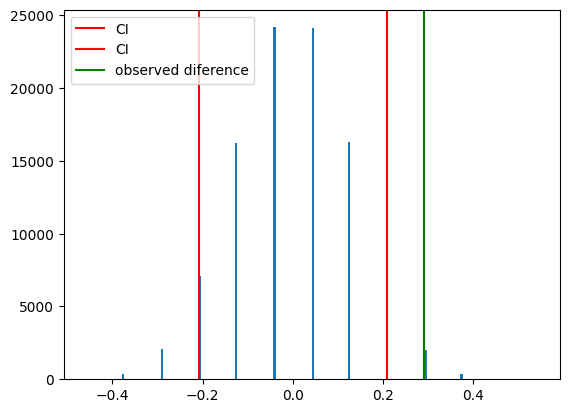

In [33]:
plt.hist(permutations, bins = 200)
plt.axvline(lb, 0, 25000, c="red", label="CI")
plt.axvline(ub, 0, 25000, c="red", label="CI")
plt.axvline(observed, 0, 25000, c="green", label="observed diference")
plt.legend()
plt.show


Здесь видно что нулевая гипотеза не подтверждена